In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
#load

data=pd.read_csv('health_insurance_cost_missing_data.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,NaN,0,yes,NaN,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [37]:
#Explore and clean

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,NaN,0,yes,NaN,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
15,19,male,24.600,1,no,southwest,1837.23700
16,52,female,30.780,1,no,northeast,10797.33620
17,23,male,23.845,0,no,northeast,2395.17155
18,56,male,40.300,0,no,southwest,10602.38500


In [39]:
data.isna().sum()

age         0
sex         0
bmi         1
children    0
smoker      0
region      1
charges     0
dtype: int64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

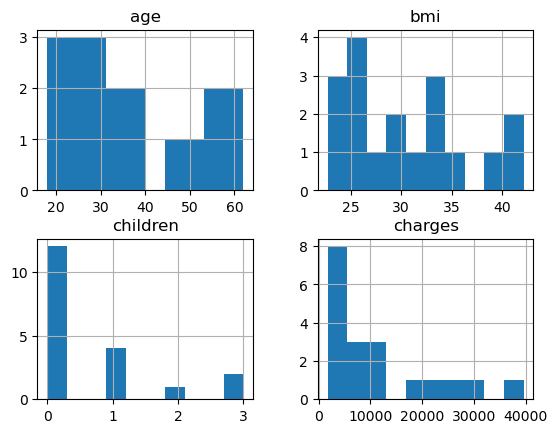

In [40]:
data.hist()

In [41]:
data.describe()

,age,bmi,children,charges
count,19.000000,18.000000,19.000000,19.000000
mean,36.000000,30.518333,0.631579,11169.001194
std,14.843629,5.891149,1.011628,10961.698148
min,18.000000,22.705000,0.000000,1725.552300
25%,24.000000,25.935000,0.000000,3238.971200
50%,32.000000,29.355000,0.000000,7281.505600
75%,49.000000,33.687500,1.000000,13987.820900
max,62.000000,42.130000,3.000000,39611.757700


In [42]:
data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,NaN,0,yes,NaN,16884.924


In [52]:
data.describe()

,age,bmi,children,charges
count,19.000000,18.000000,19.000000,19.000000
mean,36.000000,30.518333,0.631579,11169.001194
std,14.843629,5.891149,1.011628,10961.698148
min,18.000000,22.705000,0.000000,1725.552300
25%,24.000000,25.935000,0.000000,3238.971200
50%,32.000000,29.355000,0.000000,7281.505600
75%,49.000000,33.687500,1.000000,13987.820900
max,62.000000,42.130000,3.000000,39611.757700


In [43]:
data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,NaN,0,yes,NaN,16884.924


In [44]:
x=data.iloc[:,:-1]
x.head(2)

,age,sex,bmi,children,smoker,region
0,19,female,NaN,0,yes,NaN
1,18,male,33.77,1,no,southeast


In [45]:
y=data.iloc[:,-1:]
y.head(2)

,charges
0,16884.9240
1,1725.5523


In [46]:
type(x)

pandas.core.frame.DataFrame

In [47]:
type(y)

pandas.core.frame.DataFrame

In [48]:
a=data.iloc[:,:-1].values
b=data.iloc[:,-1:].values
print(type(a),type(b))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [49]:
b

array([[16884.924  ],
       [ 1725.5523 ],
       [ 4449.462  ],
       [21984.47061],
       [ 3866.8552 ],
       [ 3756.6216 ],
       [ 8240.5896 ],
       [ 7281.5056 ],
       [ 6406.4107 ],
       [28923.13692],
       [ 2721.3208 ],
       [27808.7251 ],
       [ 1826.843  ],
       [11090.7178 ],
       [39611.7577 ],
       [ 1837.237  ],
       [10797.3362 ],
       [ 2395.17155],
       [10602.385  ]])

In [50]:
data.corr()

C:\Users\ankit\AppData\Local\Temp\ipykernel_5948\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,bmi,children,charges
age,1.000000,0.166410,-0.103592,0.407481
bmi,0.166410,1.000000,-0.016982,0.183230
children,-0.103592,-0.016982,1.000000,-0.317735
charges,0.407481,0.183230,-0.317735,1.000000


In [76]:
#Implement Simple Linear Regression:

from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to your training data
model.fit(x_train, y_train)

LinearRegression()

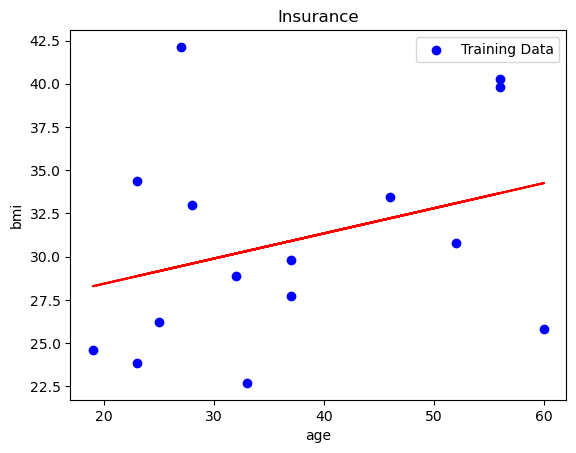

In [77]:
import matplotlib.pyplot as plt

# Visualize the training data points
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plot the regression line
plt.plot(X_train, model.predict(X_train), color='red')

plt.title('Insurance')
plt.xlabel('age')
plt.ylabel('bmi')
plt.legend()
plt.show()

In [78]:
#Split the Dataset:

from sklearn.model_selection import train_test_split

x = data[['age']]  # Feature (independent variable)
y = data['bmi']  # Target (dependent variable)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [79]:
data.shape

(19, 7)

In [80]:
x_train.shape

(15, 1)

In [81]:
x_test

,age
0,19
5,31
11,62
1,18


In [82]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

#train the data

print('Training Started.......\n')

print()

lin_reg.fit(x_train, y_train)

print()

print('Training Completed.....')

print()

#test the data

print('Testing invoked......\n')

y_pred=lin_reg.predict(x_test)

print('Predicted Total Payment \n',y_pred)

print('\n Testing is also completed....\n')

Training Started.......



Training Completed.....

Testing invoked......

Predicted Total Payment 
 [28.29401021 30.03913349 34.54736863 28.14858327]

 Testing is also completed....



In [83]:
y_test

0       NaN
5     25.74
11    26.29
1     33.77
Name: bmi, dtype: float64

In [84]:
diff= y_test- y_pred
diff

0          NaN
5    -4.299133
11   -8.257369
1     5.621417
Name: bmi, dtype: float64

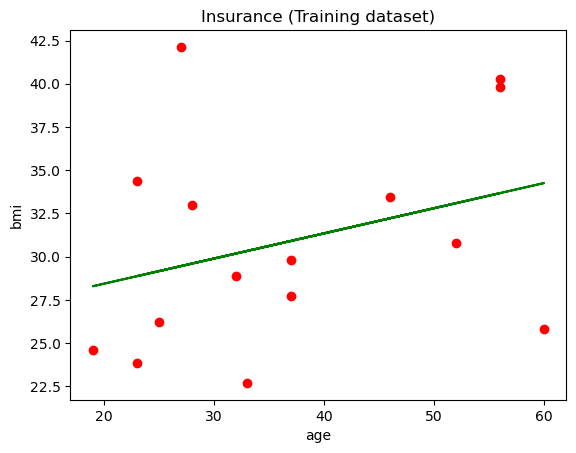

In [86]:
#Visualize the training dataset

plt.scatter (x_train, y_train, color='red')

plt.plot(x_train, lin_reg.predict(x_train), color='green')

plt.title('Insurance (Training dataset)')

plt.xlabel('age')

plt.ylabel('bmi')

plt.show()

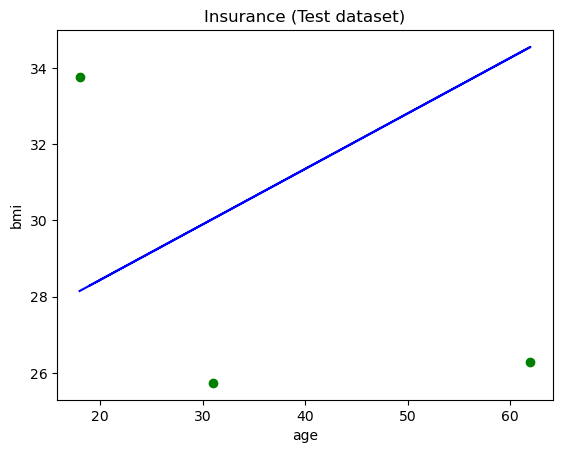

In [87]:
#Visualize the training dataset

plt.scatter (x_test, y_test, color='green')

plt.plot(x_test, lin_reg.predict(x_test), color='blue')

plt.title('Insurance (Test dataset)')

plt.xlabel('age')

plt.ylabel('bmi')

plt.show()

In [98]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

from sklearn.metrics import explained_variance_score

print('Mean Squared Error: \t',mean_squared_error(y_test, y_pred))
print()

print('RMSE:\t', np.sqrt(mean_squared_error(y_test, y_pred)))
print()

print('Variance Score: \t', explained_variance_score (y_test,y_pred))

# Coeficient of determination R_square
print()
print('R-Square: \t', r2_score(y_test,y_pred))

ValueError: Input contains NaN.